In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy
from RecoPulseLikelihoodRatio import likelihoodfit
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import csv

In [6]:
import scipy
scipy.__version__

'0.19.0'

In [ ]:
import imi

In [2]:
read_file = open('/data/p-one/akatil/analysis/RecoPulses/RecoPulseFitInfo_correcectedchi2.csv', 'r')

file_num, frame_num, lepton, DOM, string = ([]), ([]), ([]), ([]), ([])
binEntries_mean, success_biGauss, success_doublePeak = ([]), ([]), ([])
biGauss_pos, biGauss_wid, biGauss_rat, biGauss_amp = ([]), ([]), ([]), ([])
doublePeak_amp1, doublePeak_amp2, doublePeak_pos1, doublePeak_pos2 = ([]), ([]), ([]), ([])
doublePeak_rat1, doublePeak_rat2, doublePeak_wid1, doublePeak_wid2 = ([]), ([]), ([]), ([])
area_data, area_biGauss_fit, area_doublePeak_fit = ([]), ([]), ([])
gof_biGauss, gof_doublePeak = ([]), ([])
with read_file:

    reader = csv.DictReader(read_file)
    
    for row in reader:
        file_num = np.append(file_num, row['file'])
        frame_num = np.append(frame_num, row['frame'])
        lepton =np.append(lepton, row['lepton_type'])
        DOM = np.append(DOM, row['DOM']) #DOM and string have been interchanged
        string = np.append(string, row['string'])
        binEntries_mean = np.append(binEntries_mean, float(row['binEntries_mean']))
        success_biGauss = np.append(success_biGauss, row['success_biGauss'])
        success_doublePeak = np.append(success_doublePeak, row['success_doublePeak'])
        biGauss_pos = np.append(biGauss_pos, float(row['biGauss_pos']))
        biGauss_wid = np.append(biGauss_wid, float(row['biGauss_wid']))
        biGauss_rat = np.append(biGauss_rat, float(row['biGauss_rat']))
        biGauss_amp = np.append(biGauss_amp, float(row['biGauss_amp']))
        doublePeak_pos1 = np.append(doublePeak_pos1, float(row['doublePeak_pos1']))
        doublePeak_wid1 = np.append(doublePeak_wid1, float(row['doublePeak_wid1']))
        doublePeak_rat1 = np.append(doublePeak_rat1, float(row['doublePeak_rat1']))
        doublePeak_amp1 = np.append(doublePeak_amp1, float(row['doublePeak_amp1']))
        doublePeak_pos2 = np.append(doublePeak_pos2, float(row['doublePeak_pos2']))
        doublePeak_wid2 = np.append(doublePeak_wid2, float(row['doublePeak_wid2']))
        doublePeak_rat2 = np.append(doublePeak_rat2, float(row['doublePeak_rat2']))
        doublePeak_amp2 = np.append(doublePeak_amp2, float(row['doublePeak_amp2']))
        area_data = np.append(area_data, float(row['area_data']))
        area_biGauss_fit = np.append(area_biGauss_fit, float(row['area_biGauss_fit']))
        area_doublePeak_fit = np.append(area_doublePeak_fit, float(row['area_doublePeak_fit']))
        gof_biGauss = np.append(gof_biGauss, float(row['gof_biGauss']))
        gof_doublePeak = np.append(gof_doublePeak, float(row['gof_doublePeak']))

In [3]:
'''
Selecting DOMs with goodness of fit < 2, only double peak fit chi2 values are considered
'''
gof_bool_biGauss = (gof_biGauss > 0)&(gof_biGauss < 2)
gof_bool_dp = (gof_doublePeak > 0)&(gof_doublePeak < 2)

select_gof_biGauss = gof_biGauss[gof_bool_dp]
select_gof_dp = gof_doublePeak[gof_bool_dp]
select_file_num = file_num[gof_bool_dp]
select_frame_num = frame_num[gof_bool_dp]
select_string = DOM[gof_bool_dp]
select_DOM = string[gof_bool_dp]

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [4]:
gof_biGauss

array([12.9562574 ,  1.94526641,  9.48373854, ..., 14.77778603,
       10.41280474,  8.01624411])

1392
OMKey(9,19,0)
Now Histogramming
1420
OMKey(2,4,0)
Now Histogramming
1461
OMKey(4,4,0)
Now Histogramming
1465
OMKey(4,5,0)
Now Histogramming
1470
OMKey(8,18,0)
Now Histogramming
1548
OMKey(5,1,0)
Now Histogramming
1587
OMKey(3,10,0)
Now Histogramming
1626
OMKey(7,17,0)
Now Histogramming
('PARAMETERS -', 205.68889850385563, 256.81942366691413, 204.47555173017707, 194.42140765899438, 215.93630311996822, 194.21328219254093, 202.7975175286515, -573.7818558840007)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  0.27144174,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1372.770721895732)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  0.28501382,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1371.2628393925343)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  0.27144174,  21.      

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in log



('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 0.18189729, 45.745092  ,  1.10290109, 96.55032663, 42.96765828,
       35.72874601,  0.51489987,  7.9303625 ]), -2302.819001312795)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 0.16683822, 49.5129299 ,  1.11172428, 76.4015264 , 43.6396846 ,
       37.3421177 ,  0.41906084,  9.57508196]), -2281.651722606984)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 0.17505629, 47.09882043,  1.11834524, 90.22501866, 43.2033478 ,
       36.3917958 ,  0.46249507, 11.31180275]), -2296.216654940321)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 0.18552934, 44.24323497,  1.10201317, 97.86875832, 42.21128598,
       35.14830427,  0.54874793,  4.61802275]), -2300.697222644576)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 0.16222528, 50.14367853,  1.07851843, 64.72807056, 44.22498109,
       37.74838854,  0.4363

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([-0.24952291, 83.4817739 ,  2.93021086, 96.82568687, 48.34364187,
       38.00349412,  1.3361943 ,  4.92599559]), -2324.252354363682)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([-0.26865679, 85.29104538,  2.974664  , 90.05557758, 47.82752403,
       37.9832359 ,  1.37616483,  5.83311299]), -2324.894415199155)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([-0.38776026, 96.00891944,  3.44167717, 84.98223215, 49.37018828,
       38.96597405,  1.57587418,  5.48276668]), -2323.090328607726)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([-0.28523006, 86.27466973,  3.04938867, 92.42590155, 48.9122965 ,
       38.69428366,  1.35857788,  5.44154901]), -2325.4893312746176)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([-0.39542877, 95.73423089,  3.49025141, 90.50051679, 51.12272312,
       40.12041716,  1.5025

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -2.253541  , 245.38611793,  11.2089764 , 104.89492032,
        57.72012378,  37.46951132,   5.74261419,   8.54838444]), -2342.123089579643)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -2.30131431, 248.96119426,  11.41343484, 105.40457019,
        57.24520893,  36.8512718 ,   5.88738126,   8.92244653]), -2342.1086042846705)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -2.35322308, 253.41878331,  11.61729367, 104.55252377,
        57.72412351,  37.10990535,   5.98705279,   8.63335821]), -2342.275696322419)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -2.38937629, 256.43109254,  11.76124017, 104.39681431,
        57.87983466,  37.12743159,   6.06811413,   8.32227973]), -2342.2879148270385)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -2.35484092, 253.71922847,  11.62021082, 103.75995732,
   

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.18621046, 466.81006927,  21.94604465, 127.65709284,
        59.89255101,  47.69438053,  11.44049361,  12.74152679]), -2366.4748289032414)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.76967973, 510.15956416,  24.01729905, 130.72115978,
        59.85198248,  50.44459686,  12.51793639,  14.05599513]), -2368.9521223091774)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -4.87160676, 441.78349047,  20.55737607, 124.55482455,
        60.12261663,  50.22421801,  10.5821959 ,  11.1472492 ]), -2368.8159878178067)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.02869395, 452.21690256,  21.05892428, 122.25942774,
        59.69568245,  51.63515455,  10.7950729 ,  14.0883841 ]), -2366.6501647327277)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.15207805, 459.14280408,  21.2907842 , 132.43400412,
 

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.53538651, 676.24063291,  29.0449182 , 134.68850447,
        57.537119  , 127.04103993,  13.12313569,   6.52297462]), -2399.546754204007)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -9.12568588, 720.25275218,  31.11004233, 134.80094405,
        57.43004305, 129.61129476,  14.23633155,   5.91412027]), -2399.6496177106137)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.72058711, 695.27680039,  30.3369546 , 132.51956283,
        56.87511345, 117.88113613,  14.18678815,   5.4338818 ]), -2399.237702412976)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.58168666, 680.99967478,  29.3679273 , 134.14626906,
        57.37161761, 124.75106398,  13.3890488 ,   6.25070141]), -2400.053848765847)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -7.99428793, 641.45141176,  27.83630171, 132.2434545 ,
    

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.68494323, 681.00912743,  28.97928506, 131.11667095,
        55.83207833, 134.92479884,  12.86928129,   5.91613607]), -2400.5327627784022)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.68417646, 681.15906839,  28.99332308, 130.91618922,
        55.84146758, 134.73223456,  12.88184204,   6.01297451]), -2400.530378189447)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.72700643, 684.46698651,  29.17591344, 131.69029714,
        55.7283656 , 134.40552657,  12.99924726,   5.9517477 ]), -2400.538389529673)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.75103212, 686.58403161,  29.299972  , 131.89125794,
        55.67412601, 133.97424155,  13.08343458,   6.03708012]), -2400.533569553538)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.73450989, 685.19030556,  29.21980026, 131.69761119,
    

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.68986618, 667.47856548,  28.37917733, 130.40583748,
        55.31828718, 142.60896551,  12.16524306,   6.18912455]), -2400.729257345173)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.7524182 , 670.62382894,  28.36879997, 130.62614936,
        55.30314113, 146.23393186,  12.05163954,   6.04594291]), -2400.690867941171)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.67078209, 664.39169605,  28.16084452, 129.94473075,
        55.39557709, 144.60971126,  11.97083309,   6.07044991]), -2400.705579421205)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.66557019, 667.37927974,  28.42684384, 130.80667976,
        55.60455084, 140.78070385,  12.25244353,   6.16923071]), -2400.716639450261)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -8.68729223, 664.53703684,  28.22253335, 130.51968111,
     

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -7.26208886, 413.47369795,  20.66146043, 135.02804585,
        47.21775965, 154.55752764,   5.87936341,   6.12457074]), -2404.969809235543)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -7.1094794 , 394.00944615,  19.79369355, 135.24643565,
        44.55541439, 156.7591205 ,   5.31351462,   5.97887818]), -2405.1084098806286)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -7.46068964, 401.65198694,  20.32107779, 134.7888572 ,
        45.65462352, 167.23622743,   5.07759263,   5.93866607]), -2405.081569263481)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -7.45600007, 438.04662685,  22.00081861, 138.05501009,
        46.32798831, 146.50980807,   6.98317185,   6.48586369]), -2403.8762708557265)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -7.37603409, 418.03128237,  20.82970592, 133.72057999,
   

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -6.54874664, 263.2078864 ,  14.73892868, 122.31250796,
        13.81718223, 178.08657304,   1.61387425,   8.34857742]), -2410.8433388821654)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -6.47923329, 252.44828994,  14.35899596, 121.06804612,
         9.53407364, 177.47377913,   1.45905418,   8.70216465]), -2410.991538721544)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -6.54438592, 263.21872865,  14.84244502, 124.03807336,
        13.60181116, 176.23002138,   1.73190862,   8.32040901]), -2410.9284090741603)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -6.45058727, 264.48800274,  14.78700251, 124.95885705,
        15.2438735 , 173.24411336,   1.84154988,   8.05780107]), -2410.6471914903905)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -6.53821551, 252.66259303,  14.60840866, 126.73617678,
  

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.06519434, 157.69811095,  10.62192904, 127.72835786,
        -4.78249655, 148.6910636 ,   0.59319094,  10.12319085]), -2412.8902111110147)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.31275604, 170.51366618,  11.17520499, 125.05640231,
        -5.19615133, 153.69347423,   0.71511487,  10.22485839]), -2412.884898993684)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.45228243, 182.27070957,  11.6264089 , 125.49723967,
        -1.54564169, 156.44437001,   0.82115274,   9.86919943]), -2413.00536366035)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.50571618, 187.95802585,  11.90073725, 125.77219604,
         0.67927349, 156.47214419,   0.93327378,   9.81456468]), -2413.052693275169)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -5.45808984, 181.11985269,  11.60899539, 124.93607407,
     

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.89358793,  99.10172114,   8.93993453, 120.52425436,
        -1.68982108, 113.77584424,   0.62755285,  15.67424285]), -2416.184233943032)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -4.08096941, 107.04055665,   9.25230331, 120.90271111,
        -2.20602838, 118.66286935,   0.63463542,  15.16205412]), -2416.1481610012383)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.81405651,  95.29812042,   8.73905558, 120.57452788,
        -2.22023537, 112.28840131,   0.59363161,  15.70080736]), -2416.1821144325304)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.8812095 ,  99.17258337,   8.83296648, 120.04037298,
        -2.35637517, 114.46391521,   0.5860138 ,  15.53486746]), -2416.168386630979)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.87911347,  99.7087406 ,   8.82234609, 121.23856611,
   

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -4.05451889, 103.52751287,   9.15994493, 120.09078991,
        -5.15457228, 118.00787505,   0.62121547,  16.61115015]), -2416.3290052828224)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.90325875,  97.94155781,   8.87994155, 120.03007916,
        -4.80626241, 114.47913939,   0.60784929,  16.83487363]), -2416.318237653769)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -4.03064242, 102.67872724,   9.14109851, 120.31220468,
        -5.08284335, 117.14407694,   0.63820626,  16.74762772]), -2416.314014613561)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.9710527 , 100.57998243,   8.98012606, 121.01542052,
        -5.04314923, 116.32874161,   0.60547777,  16.47130307]), -2416.316620902481)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.93986315,  99.61536659,   8.89721827, 119.90567822,
    

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.74482452,  80.66523764,   7.53124656, 115.88277963,
       -34.34099293, 119.56124511,   0.21114583,  26.71512576]), -2416.7943739630095)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.7000134 ,  77.7948906 ,   7.34654324, 115.73416492,
       -37.21250228, 119.3126627 ,   0.17343183,  27.69526887]), -2416.7817012708224)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.74814263,  82.22665524,   7.60063694, 116.92244517,
       -31.73826667, 119.27144994,   0.2319896 ,  25.626455  ]), -2416.775101043334)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.79743653,  83.56315793,   7.72860393, 115.69723433,
       -31.80613589, 119.9609723 ,   0.2491073 ,  25.9199888 ]), -2416.789908113429)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -3.93162659,  89.22598362,   8.02196954, 116.1777812 ,
   

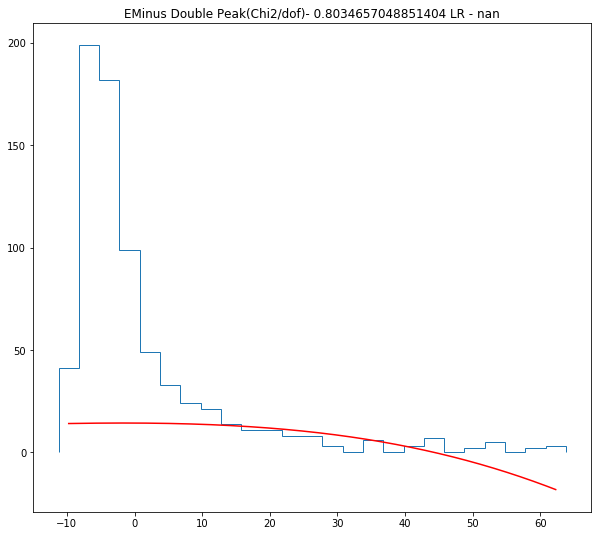

In [7]:
'''
plotting the histograms
'''

for i in range(50, 70):
#for i in select_file_num[10:40]:
    print(select_file_num[i])
    file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    #print('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    frameList = []
    j = 0
    while(file_name.more()):
        frameList.append(file_name.pop_daq())
    frame_number = int(select_frame_num[i])
    frame_i = frameList[frame_number]
    mctree = frame_i["I3MCTree"]
    primary = mctree.primaries
    lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)    
    
    omkey = OMKey(int(select_string[i]), int(select_DOM[i]), 0)
    print(omkey)
    recoPulseMap = frame_i['I3RecoPulses']
    recoPulseList = recoPulseMap[omkey]
    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
    
    '''
    Removing DOMs with hits less than 100 Hits
    '''
    if sum(recoPulse_chargeList) < 100:
        print(sum(recoPulse_chargeList))
        print('exit1')
        continue

    '''
    Calculating the mean and removing the tails
    '''

    #mean = recoPulse_timeList.mean()
    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

    if len(select_time) < 10:
        print('exit2')
        continue

    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

    #[using zscore to remove the effect of outliers from the analysis]
    z = stats.zscore(max_hitTimes)
    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

    if len(max_hitTimes) < 10:
        print('exit3')
        continue

    #Shifting mean to zero
    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
    timestamps = max_hitTimes - max_hitTimes_mean
    final_mean = timestamps.mean()

    '''
    Histogramming the data from simulation
    '''
    print('Now Histogramming')
    bins = np.arange(min(timestamps), max(timestamps), 3)
    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
    #removing bins with < 0 entries ---> Recommended for binned likelihood
    entries_in_bins = num[num > 0]
    bin_centers = bin_centers[num > 0]

    #Degrees of freedom should be greater than zero!
    if len(entries_in_bins) < 8:
        continue

    #Getting data for the chi2 fit
    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
    chi2_bin_centers = bin_centers[entries_in_bins > 10]

    num_dataPoints = len(entries_in_bins)
    area_data = sum(entries_in_bins)
    mean_entries = entries_in_bins.mean()

    '''
    Fitting bifurcated Gaussian and double bifurcated gaussian to
    the mcpe hit time distributions for both tau and electron.
    '''

    #Single Peak

    nll = lambda *args: log_likelihood_biGauss(*args)
    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                    args=(entries_in_bins, bin_centers),
                                    method='Powell',
                                    bounds = bnds_biGauss)

    #Double Peak

    nll = lambda *args: log_likelihood_doublePeak(*args)
    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                args=(entries_in_bins, bin_centers),
                                method='Powell',
                                bounds=bnds_doublePeak)
    
    LR_biGauss = likelihood_ratio_biGauss(bin_centers, entries_in_bins, soln_biGauss.x[0],
                                              soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
    LR_doublePeak = likelihood_ratio_doublePeak(bin_centers, entries_in_bins, soln_doublePeak.x[0],
                                                    soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
    
    '''
    goodness of fit - Chi2 = 2*ln(LR)
    '''
    gof_DOM_biGauss = (2*LR_biGauss)/(num_dataPoints - 4)
    gof_DOM_doublePeak = (2*LR_doublePeak)/(num_dataPoints - 8)
    
    if gof_DOM_doublePeak != gof_DOM_doublePeak:
        print('PARAMETERS -', soln_doublePeak.x[0], soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
        
        def log_likelihood_doublePeak_test(theta, n, x):
            pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
            model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
            L = model - (n*np.log(model))
            print('*****************Double Peak***************', int(i), omkey)
            print(theta, np.sum(L))
            return np.sum(L)
        
        
        soln_doublePeak_test = minimize(log_likelihood_doublePeak_test, initial_doublePeak,
                            args=(entries_in_bins, bin_centers),
                            method='Nelder-Mead')
                            #bounds=bnds_doublePeak
    
        '''
        (x, y) values for the fit
        '''
        #x = bin_centers
        x = np.linspace(min(bin_centers), max(bin_centers), 1000)
        y_biGauss = biGauss(x, soln_biGauss.x[0],
                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
        y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
    
    
                    
        plt.figure(figsize=(10,9))
        _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
        #plt.plot(x, y_biGauss, '-', c = 'k')
        plt.plot(x, y_doublePeak, '-', c = 'r')
        plt.title(str(lepton.type) +' Double Peak(Chi2/dof)- '+ str(select_gof_dp[i])+' LR - '+str(gof_DOM_doublePeak))
        break

In [ ]:
# frame_in_file = select_frame_num[select_file_num == i]
    frame_number = 0
    for frame in file:
        for j in frame_in_file:
            if frame_number == int(j):
                mctree = frame["I3MCTree"]
                primary = mctree.primaries
                lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
                
                recoPulseMap = frame['I3RecoPulses']
                select_string_in_frame = select_string[(select_file_num == i) & (select_frame_num == j)]
                
                for k in select_string_in_frame:
                    select_DOM_with_string = select_DOM[(select_file_num == i) & (select_frame_num == j) & (select_string == k)]
                    omkey = OMKey(int(k), int(select_DOM_with_string[0]), 0)
                    print('OMKEY', omkey)
                    print(num)
                    print(i, j, k, int(select_DOM_with_string[0]))
                    print(i, select_frame_num[num], select_string[num], select_DOM[num])
                    select_gof_DOM_biGauss = select_gof_biGauss[(select_file_num == i) & (select_frame_num == j) & (select_string == k)& (select_DOM == select_DOM_with_string[0])]
                    select_gof_DOM_dp = select_gof_dp[(select_file_num == i) & (select_frame_num == j) & (select_string == k)& (select_DOM == select_DOM_with_string[0])]
                    
                    recoPulseList = recoPulseMap[omkey]
                    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
                    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
                    
                    '''
                    Removing DOMs with hits less than 100 Hits
                    '''
                    if sum(recoPulse_chargeList) < 100:
                        print('exit1')
                        continue

                    '''
                    Calculating the mean and removing the tails
                    '''

                    #mean = recoPulse_timeList.mean()
                    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
                    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
                    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
                    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

                    if len(select_time) < 10:
                        print('exit2')
                        continue

                    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
                    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
                    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

                    #[using zscore to remove the effect of outliers from the analysis]
                    z = stats.zscore(max_hitTimes)
                    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
                    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

                    if len(max_hitTimes) < 10:
                        print('exit3')
                        continue

                    #Shifting mean to zero
                    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
                    timestamps = max_hitTimes - max_hitTimes_mean
                    final_mean = timestamps.mean()

                    '''
                    Histogramming the data from simulation
                    '''
                    print('Now Histogramming')
                    bins = np.arange(min(timestamps), max(timestamps), 1)
                    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
                    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
                    #removing bins with < 0 entries ---> Recommended for binned likelihood
                    entries_in_bins = num[num > 0]
                    bin_centers = bin_centers[num > 0]

                    #Degrees of freedom should be greater than zero!
                    if len(entries_in_bins) < 8:
                        continue

                    #Getting data for the chi2 fit
                    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
                    chi2_bin_centers = bin_centers[entries_in_bins > 10]

                    num_dataPoints = len(entries_in_bins)
                    area_data = sum(entries_in_bins)
                    mean_entries = entries_in_bins.mean()

                    '''
                    Fitting bifurcated Gaussian and double bifurcated gaussian to
                    the mcpe hit time distributions for both tau and electron.
                    '''

                    #Single Peak

                    nll = lambda *args: log_likelihood_biGauss(*args)
                    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
                    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
                    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                            args=(entries_in_bins, bin_centers),
                                            method='Powell',
                                            bounds = bnds_biGauss)

                    #Double Peak

                    nll = lambda *args: log_likelihood_doublePeak(*args)
                    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
                    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
                    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                                args=(entries_in_bins, bin_centers),
                                                method='Powell',
                                                bounds=bnds_doublePeak)
                    
                    '''
                    (x, y) values for the fit
                    '''
                    #x = bin_centers
                    x = np.linspace(min(bin_centers), max(bin_centers), 1000)
                    y_biGauss = biGauss(x, soln_biGauss.x[0],
                                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                    y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
                    
                    plt.figure(figsize=(10,9))
                    _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
                    plt.plot(x, y_biGauss, '-', c = 'k')
                    plt.plot(x, y_doublePeak, '-', c = 'r')
                    plt.title(str(lepton.type)+' '+ str(select_gof_DOM_biGauss) +' '+ str(select_gof_DOM_dp))
                
            frame_number += 1    
    num += 1